In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Obtain Data

In [ ]:
URL_DATA = 'https://storage.data.gov.my/demography/arrivals_soe.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df

,date,country,soe,arrivals,arrivals_male,arrivals_female
0,2020-01-01,ABW,Kedah,0,0,0
1,2020-01-01,ABW,Pulau Pinang,0,0,0
2,2020-01-01,AFG,Johor,2,0,2
3,2020-01-01,AFG,Kedah,1,1,0
4,2020-01-01,AFG,Perlis,0,0,0
...,...,...,...,...,...,...
92669,2024-10-01,ZMB,Sarawak,1,1,0
92670,2024-10-01,ZMB,Selangor,68,39,29
92671,2024-10-01,ZWE,Johor,7,4,3
92672,2024-10-01,ZWE,Pulau Pinang,5,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92674 entries, 0 to 92673
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             92674 non-null  datetime64[ns]
 1   country          92674 non-null  object        
 2   soe              92674 non-null  object        
 3   arrivals         92674 non-null  int64         
 4   arrivals_male    92674 non-null  int64         
 5   arrivals_female  92674 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.2+ MB


In [ ]:
# Check Data Types
print("Column Data Types:\n", df.dtypes)


Column Data Types:
 date               datetime64[ns]
country                    object
soe                        object
arrivals                    int64
arrivals_male               int64
arrivals_female             int64
dtype: object


In [ ]:
#Convert object to category
df['country'] = df['country'].astype('category')
df['soe'] = df['soe'].astype('category')

In [ ]:
# Check the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 92674
Number of columns: 6


In [ ]:
print("Number of unique countries:", df['country'].nunique())
print("Number of unique SOE:", df['soe'].nunique())

Number of unique countries: 224
Number of unique SOE: 14


In [ ]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Check for missing (empty) data
missing_data_summary = df.isnull().sum()
print("Missing data summary:")
print(missing_data_summary)


Number of duplicate rows: 0
Missing data summary:
date               0
country            0
soe                0
arrivals           0
arrivals_male      0
arrivals_female    0
dtype: int64


In [ ]:
df.rename(columns={
    'date': 'Date',
    'country': 'Country',
    'soe': 'State_of_Entry',
    'arrivals': 'Total_Arrivals',
    'arrivals_male': 'Male_Arrivals',
    'arrivals_female': 'Female_Arrivals'
}, inplace=True)

# Verify the column names
print(df.head())

        Date Country State_of_Entry  Total_Arrivals  Male_Arrivals  \
0 2020-01-01     ABW          Kedah               0              0   
1 2020-01-01     ABW   Pulau Pinang               0              0   
2 2020-01-01     AFG          Johor               2              0   
3 2020-01-01     AFG          Kedah               1              1   
4 2020-01-01     AFG         Perlis               0              0   

   Female_Arrivals  
0                0  
1                0  
2                2  
3                0  
4                0  


In [ ]:
# Extract the year from the 'date' column
df['Year'] = df['Date'].dt.year
# Extract month from date
df['Month'] = df['Date'].dt.month

# Rearranging the columns
new_order = ['Date', 'Month','Year','Country','State_of_Entry','Male_Arrivals','Female_Arrivals','Total_Arrivals']
df = df[new_order]

df.head()

,Date,Month,Year,Country,State_of_Entry,Male_Arrivals,Female_Arrivals,Total_Arrivals
0,2020-01-01,1,2020,ABW,Kedah,0,0,0
1,2020-01-01,1,2020,ABW,Pulau Pinang,0,0,0
2,2020-01-01,1,2020,AFG,Johor,0,2,2
3,2020-01-01,1,2020,AFG,Kedah,1,0,1
4,2020-01-01,1,2020,AFG,Perlis,0,0,0


In [ ]:
#Statistical summary
df.describe(include='category')

,Country,State_of_Entry
count,92674,92674
unique,224,14
top,IDN,Selangor
freq,803,12099


In [ ]:
#Statistical Summary
df.describe(include='number')

,Month,Year,Male_Arrivals,Female_Arrivals,Total_Arrivals
count,92674.000000,92674.000000,92674.000000,92674.000000,9.267400e+04
mean,6.344865,2021.780046,506.517308,402.103762,9.086211e+02
std,3.383852,1.321401,13120.322009,9973.386137,2.305357e+04
min,1.000000,2020.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,2021.000000,0.000000,0.000000,0.000000e+00
50%,6.000000,2022.000000,0.000000,0.000000,0.000000e+00
75%,9.000000,2023.000000,4.000000,2.000000,6.000000e+00
max,12.000000,2024.000000,941547.000000,753340.000000,1.684536e+06


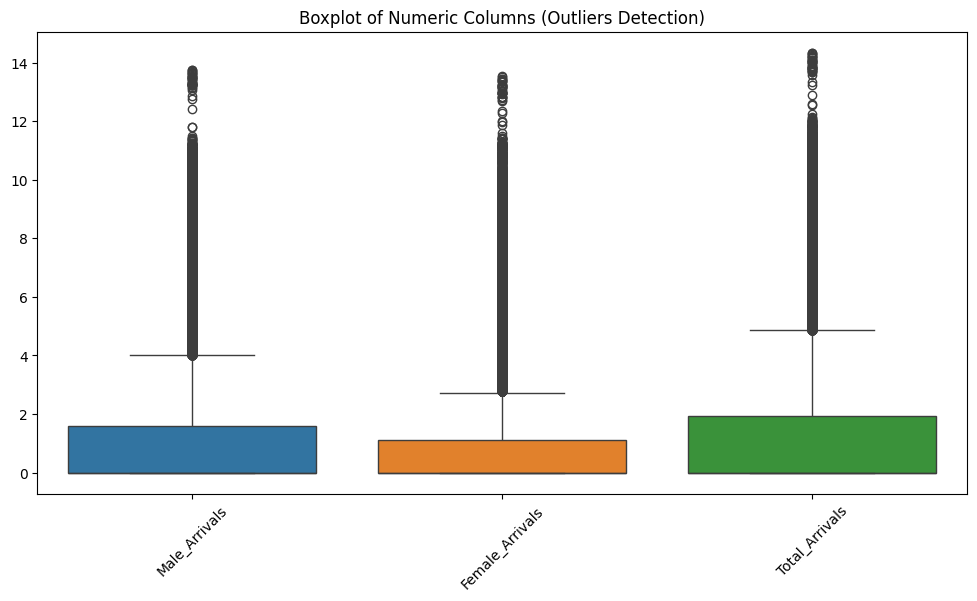

In [ ]:
# Using Boxplot to visualize outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=np.log1p(df[numeric_cols]))
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns (Outliers Detection)")
plt.show()

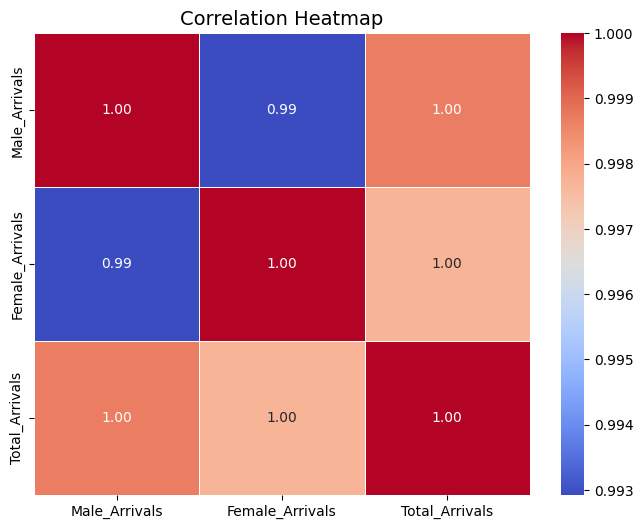

In [ ]:
# Correlation plot
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

The correlation map shows that the arrivals, arrivals_female and arrivals_male column are highly correlated indicating that the sum of arrivals_female and arrivals_male are equal to arrivals.


In [ ]:
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Count number of rows per year
rows_per_year = df['Year'].value_counts().sort_index()

# Display the result
print(rows_per_year)


Year
2020    20640
2021    20640
2022    20640
2023    19972
2024    10782
Name: count, dtype: int64


In [ ]:
# Get the total number of rows in the DataFrame where 'Total_Arrivals' is 0
total_zero_arrivals = len(df[df['Total_Arrivals'] == 0])

# Print the result
print(f"Total number of rows with 0 Total_Arrivals: {total_zero_arrivals}")

Total number of rows with 0 Total_Arrivals: 53721


In [ ]:
# Count the number of 0 Total_Arrivals per year
zero_arrivals_by_year = df[df['Total_Arrivals'] == 0].groupby('Year')['Total_Arrivals'].count().reset_index(name='Zero_Arrivals_Count')

# Calculate the total number of entries per year
total_entries_by_year = df.groupby('Year')['Total_Arrivals'].count().reset_index(name='Total_Entries_Count')

# Merge with left join to include all years from total_entries_by_year
zero_arrivals_summary = pd.merge(total_entries_by_year, zero_arrivals_by_year, on='Year', how='left')

# Fill NaN values in Zero_Arrivals_Count with 0
zero_arrivals_summary['Zero_Arrivals_Count'] = zero_arrivals_summary['Zero_Arrivals_Count'].fillna(0).astype(int)

# Calculate the percentage of zero arrivals
zero_arrivals_summary['Zero_Arrivals_Percentage'] = (
    zero_arrivals_summary['Zero_Arrivals_Count'] / zero_arrivals_summary['Total_Entries_Count']
) * 100

# Print the table
print(zero_arrivals_summary.to_markdown(index=False, numalign="left", stralign="left"))

| Year   | Total_Entries_Count   | Zero_Arrivals_Count   | Zero_Arrivals_Percentage   |
|:-------|:----------------------|:----------------------|:---------------------------|
| 2020   | 20640                 | 16142                 | 78.2074                    |
| 2021   | 20640                 | 18076                 | 87.5775                    |
| 2022   | 20640                 | 11885                 | 57.5824                    |
| 2023   | 19972                 | 7618                  | 38.1434                    |
| 2024   | 10782                 | 0                     | 0                          |


In [ ]:
# Get the number of rows before deleting all zeros
rows_before = len(df)
print(f"Number of rows before deleting all zero Total_Arrivals: {rows_before}")

# Delete all rows where 'Total_Arrivals' is equal to 0
df= df[df['Total_Arrivals'] > 0].copy()
df_nonzero =df.copy()

# Get the number of rows after deleting all zeros
rows_after = len(df)
print(f"Number of rows after deleting all zero Total_Arrivals: {rows_after}")

# Calculate the number of rows deleted
rows_deleted = rows_before - rows_after
print(f"Number of rows deleted: {rows_deleted}")

Number of rows before deleting all zero Total_Arrivals: 92674
Number of rows after deleting all zero Total_Arrivals: 38953
Number of rows deleted: 53721


In [ ]:
df_nonzero

,Date,Month,Year,Country,State_of_Entry,Male_Arrivals,Female_Arrivals,Total_Arrivals
2,2020-01-01,1,2020,AFG,Johor,0,2,2
3,2020-01-01,1,2020,AFG,Kedah,1,0,1
7,2020-01-01,1,2020,AFG,Selangor,161,19,180
11,2020-01-01,1,2020,AGO,Selangor,6,3,9
13,2020-01-01,1,2020,ALB,Johor,17,18,35
...,...,...,...,...,...,...,...,...
92669,2024-10-01,10,2024,ZMB,Sarawak,1,0,1
92670,2024-10-01,10,2024,ZMB,Selangor,39,29,68
92671,2024-10-01,10,2024,ZWE,Johor,4,3,7
92672,2024-10-01,10,2024,ZWE,Pulau Pinang,3,2,5


In [ ]:
#Save csv for Power BI
# Save the filtered DataFrame to CSV
df_nonzero.to_csv("df_nonzero.csv", index=False)

print("Filtered dataset saved as 'df_nonzero.csv'")

Filtered dataset saved as 'df_nonzero.csv'


#**Exploratory Data Analysis (EDA)**


##Total Foreign Arrivals Per Year


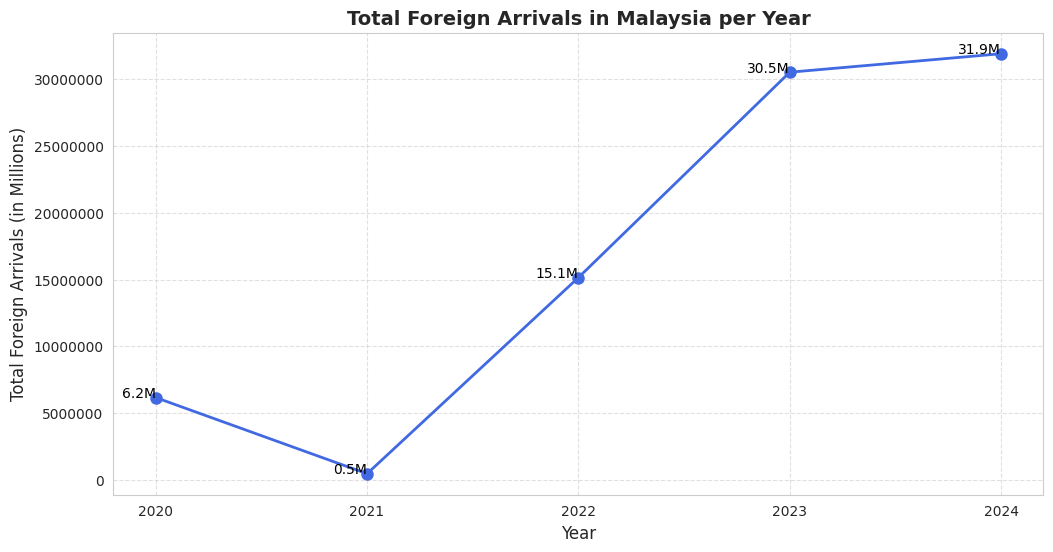

In [ ]:
#Group by year and sum total arrivals
yearly_arrivals = df.groupby('Year')['Total_Arrivals'].sum().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot line with markers
plt.plot(yearly_arrivals['Year'], yearly_arrivals['Total_Arrivals'],
         marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8)
plt.xlabel("Year", fontsize=12)
plt.xticks(yearly_arrivals['Year'].astype(int))
plt.ylabel("Total Foreign Arrivals (in Millions)", fontsize=12)
plt.title("Total Foreign Arrivals in Malaysia per Year", fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.6)

for x, y in zip(yearly_arrivals['Year'], yearly_arrivals['Total_Arrivals']):
    plt.text(x, y, f'{y/1e6:.1f}M', ha='right', fontsize=10, color='black')

plt.show()


In [ ]:
print(yearly_arrivals)

   Year  Total_Arrivals
0  2020         6172008
1  2021          470559
2  2022        15148512
3  2023        30515304
4  2024        31899166


##Monthly Trends on Foreign Arrival per Year

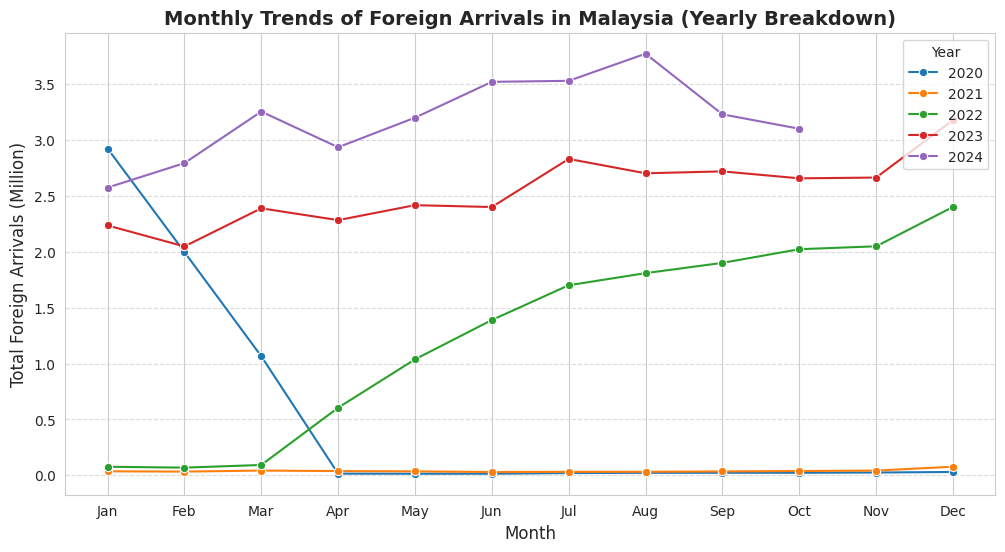

In [ ]:
#Monthly Trend per Year

# Group by Year and Month, then sum arrivals
monthly_trends_yearly = df.groupby(['Year', 'Month'])['Total_Arrivals'].sum().reset_index()

# Convert total arrivals to millions
monthly_trends_yearly['Total_Arrivals_Million'] = monthly_trends_yearly['Total_Arrivals'] / 1e6

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_trends_yearly,
    x='Month',
    y='Total_Arrivals_Million',
    hue='Year',
    marker='o',
    palette='tab10'
)

# Labels & Title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Foreign Arrivals (Million)", fontsize=12)
plt.title("Monthly Trends of Foreign Arrivals in Malaysia (Yearly Breakdown)", fontsize=14, fontweight='bold')

# Improve x-axis ticks (Month names)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.legend(title="Year", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##Top 10 Countries Visiting Malaysia

<ipython-input-23-ba34e0d54dcc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = df.groupby('Country')['Total_Arrivals'].sum().reset_index()


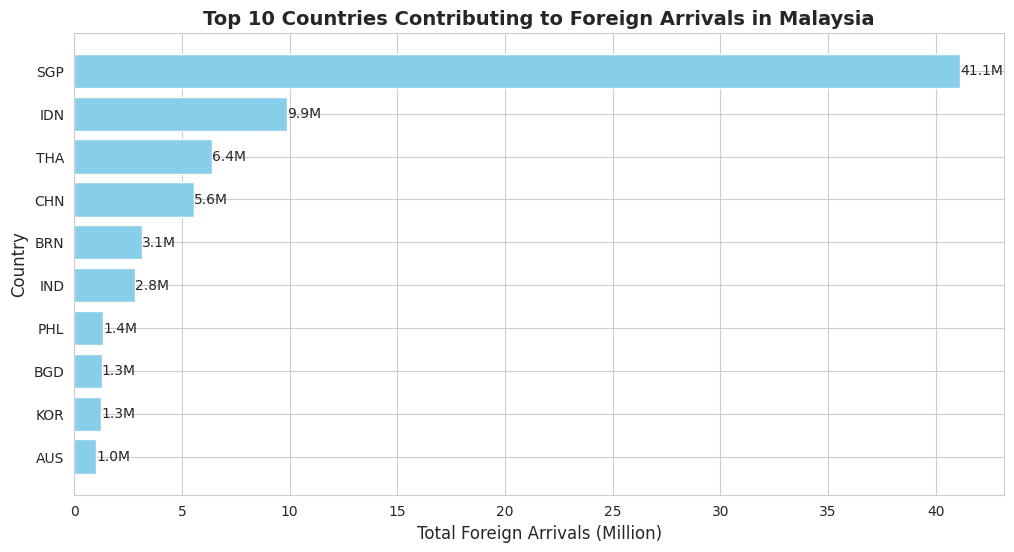

In [ ]:
# Group by Country and sum arrivals
top_countries = df.groupby('Country')['Total_Arrivals'].sum().reset_index()

# Sort in descending order and take top 10
top_countries = top_countries.sort_values(by='Total_Arrivals', ascending=False).head(10)

# Convert total arrivals to millions
top_countries['Total_Arrivals_Million'] = top_countries['Total_Arrivals'] / 1e6

# Create figure
plt.figure(figsize=(12, 6))
plt.barh(top_countries['Country'], top_countries['Total_Arrivals_Million'], color='skyblue')
plt.xlabel("Total Foreign Arrivals (Million)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Top 10 Countries Contributing to Foreign Arrivals in Malaysia", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for index, value in enumerate(top_countries['Total_Arrivals_Million']):
    plt.text(value, index, f'{value:.1f}M', va='center', fontsize=10)

plt.show()

## Top 5 State with Highest Foreign Arrivals

<ipython-input-24-b935dea89aa0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_states = df.groupby('State_of_Entry')['Total_Arrivals'].sum().reset_index()


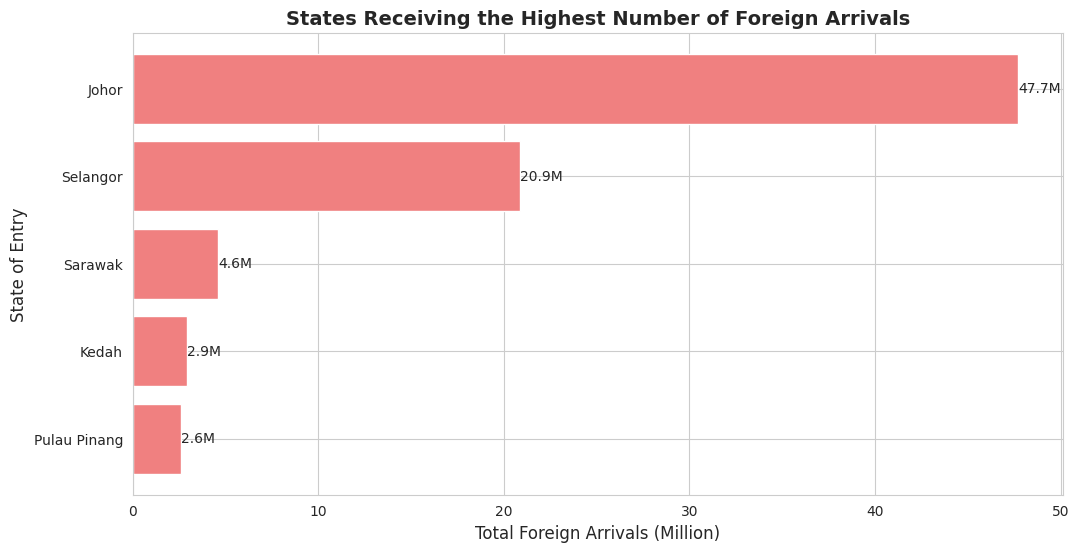

In [ ]:
top_states = df.groupby('State_of_Entry')['Total_Arrivals'].sum().reset_index()
top_states = top_states.sort_values(by='Total_Arrivals', ascending=False).head(5)

# Convert total arrivals to millions
top_states['Total_Arrivals_Million'] = top_states['Total_Arrivals'] / 1e6

# Create figure
plt.figure(figsize=(12, 6))
plt.barh(top_states['State_of_Entry'], top_states['Total_Arrivals_Million'], color='lightcoral')
plt.xlabel("Total Foreign Arrivals (Million)", fontsize=12)
plt.ylabel("State of Entry", fontsize=12)
plt.title("States Receiving the Highest Number of Foreign Arrivals", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for index, value in enumerate(top_states['Total_Arrivals_Million']):
    plt.text(value, index, f'{value:.1f}M', va='center', fontsize=10)

plt.show()


##Gender Distribution on Foreign Arrivals


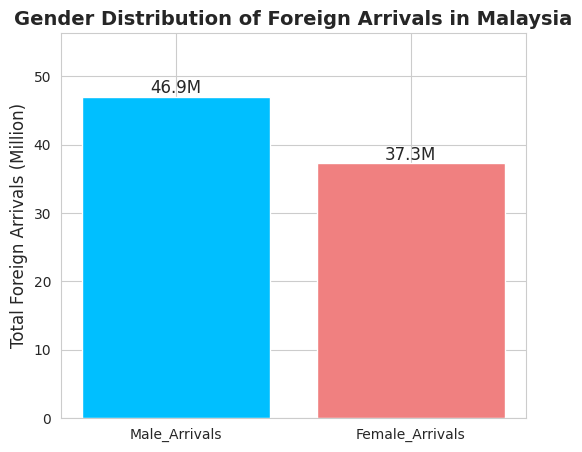

In [ ]:
# Sum male and female arrivals
gender_distribution = df[['Male_Arrivals', 'Female_Arrivals']].sum()

# Convert to millions
gender_distribution = gender_distribution / 1e6

# Plot bar chart
plt.figure(figsize=(6, 5))
plt.bar(gender_distribution.index, gender_distribution.values, color=['deepskyblue', 'lightcoral'])

# Labels & Title
plt.ylabel("Total Foreign Arrivals (Million)", fontsize=12)
plt.title("Gender Distribution of Foreign Arrivals in Malaysia", fontsize=14, fontweight='bold')

# Show values on bars
for i, v in enumerate(gender_distribution):
    plt.text(i, v, f'{v:.1f}M', ha='center', va='bottom', fontsize=12)

plt.ylim(0, gender_distribution.max() * 1.2)  # Adjust y-axis for better readability
plt.show()


#Data Preparation

In [ ]:
# Count number of rows per year
rows_per_year = df['Year'].value_counts().sort_index()

# Display the result
print(rows_per_year)

Year
2020     4498
2021     2564
2022     8755
2023    12354
2024    10782
Name: count, dtype: int64


In [ ]:
# Define the Covid flag function
def assign_covid_flag(year, month):
    if year < 2020 or (year == 2020 and month < 4):
        return 0  # Pre-COVID
    elif (year == 2020 and month >= 4) or (year == 2021) or (year == 2022 and month < 3):
        return 1  # During-COVID
    else:
        return 2  # Post-COVID

# Apply the function to create the Covid_Flag column
df["Covid_Flag"] = df.apply(lambda row: assign_covid_flag(row["Year"], row["Month"]), axis=1)

# Display the first few rows
df.head()

,Date,Month,Year,Country,State_of_Entry,Male_Arrivals,Female_Arrivals,Total_Arrivals,Covid_Flag
2,2020-01-01,1,2020,AFG,Johor,0,2,2,0
3,2020-01-01,1,2020,AFG,Kedah,1,0,1,0
7,2020-01-01,1,2020,AFG,Selangor,161,19,180,0
11,2020-01-01,1,2020,AGO,Selangor,6,3,9,0
13,2020-01-01,1,2020,ALB,Johor,17,18,35,0


In [ ]:
# Check the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")



Number of rows: 38953
Number of columns: 9


In [ ]:
# Smoothed Target Encoding
def smoothed_target_encode(data, column, target, alpha=10):
    global_mean = data[target].mean()
    agg = data.groupby(column, observed=False)[target].agg(['count', 'mean'])
    counts, means = agg['count'], agg['mean']
    smoothed = (counts * means + alpha * global_mean) / (counts + alpha)
    return data[column].map(smoothed)

df['Country_Encoded'] = smoothed_target_encode(df, 'Country', 'Total_Arrivals')
df['State_Encoded'] = smoothed_target_encode(df, 'State_of_Entry', 'Total_Arrivals')
df.drop(columns=['Country', 'State_of_Entry'], inplace=True)

In [ ]:
# --- Add percentage features ---
df['Male_Ratio'] = df['Male_Arrivals'] / df['Total_Arrivals']
df['Female_Ratio'] = df['Female_Arrivals'] / df['Total_Arrivals']

# Replace infinite or NaN (in case total_arrivals was 0 somewhere)
df['Male_Ratio'] = df['Male_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['Female_Ratio'] = df['Female_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# --- Drop raw gender count features ---
df = df.drop(['Male_Arrivals', 'Female_Arrivals'], axis=1)

df.head()

,Date,Month,Year,Total_Arrivals,Covid_Flag,Country_Encoded,State_Encoded,Male_Ratio,Female_Ratio
2,2020-01-01,1,2020,2,0,219.778732,8068.937516,0.000000,1.000000
3,2020-01-01,1,2020,1,0,219.778732,783.522568,1.000000,0.000000
7,2020-01-01,1,2020,180,0,219.778732,2230.192610,0.894444,0.105556
11,2020-01-01,1,2020,9,0,396.931235,2230.192610,0.666667,0.333333
13,2020-01-01,1,2020,35,0,147.363862,8068.937516,0.485714,0.514286


In [ ]:
#add interaction features

# Ensure the encoded columns are numeric (float64)
df['Country_Encoded'] = df['Country_Encoded'].astype('float64')
df['State_Encoded'] = df['State_Encoded'].astype('float64')

#Country and month interaction
df['Country_Covid_Interaction'] = df['Country_Encoded'] * df['Covid_Flag']

# Create the State_Country_Interaction feature
df['State_Country_Interaction'] = df['State_Encoded'] * df['Country_Encoded']


In [ ]:
#cyclical encoding
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# --- Drop raw Month features ---
df = df.drop(['Month'], axis=1)

In [ ]:
# Ensure the DataFrame is sorted by date
df = df.sort_values(by='Date')

# Add rolling statistics
df['Rolling_Mean_3'] = df['Total_Arrivals'].shift(1).rolling(window=3).mean()
df['Rolling_Std_3'] = df['Total_Arrivals'].shift(1).rolling(window=3).std()


In [ ]:
#Add lag features

df = df.sort_values('Date')

df['Lag_1'] = df['Total_Arrivals'].shift(1)
df['Lag_6']=df['Total_Arrivals'].shift(6)
df['Lag_12'] = df['Total_Arrivals'].shift(12)

df = df.dropna().reset_index(drop=True)

df.head()

,Date,Year,Total_Arrivals,Covid_Flag,Country_Encoded,State_Encoded,Male_Ratio,Female_Ratio,Country_Covid_Interaction,State_Country_Interaction,Month_sin,Month_cos,Rolling_Mean_3,Rolling_Std_3,Lag_1,Lag_6,Lag_12
0,2020-01-01,2020,180,0,219.778732,2230.192610,0.894444,0.105556,0.0,490148.902925,0.5,0.866025,16.666667,15.947834,9.0,2.0,2.0
1,2020-01-01,2020,1,0,219.778732,783.522568,1.000000,0.000000,0.0,172201.596173,0.5,0.866025,74.666667,92.143005,180.0,2.0,22.0
2,2020-01-01,2020,1,0,147.363862,816.804492,1.000000,0.000000,0.0,120367.464561,0.5,0.866025,63.333333,101.115446,1.0,1.0,5.0
3,2020-01-01,2020,76,0,211.518603,596.903239,0.697368,0.302632,0.0,126256.139124,0.5,0.866025,60.666667,103.345698,1.0,6.0,62.0
4,2020-01-01,2020,371,0,235.735364,2230.192610,0.679245,0.320755,0.0,525735.266236,0.5,0.866025,26.000000,43.301271,76.0,35.0,1.0


In [ ]:
df.shape

(38939, 17)

In [ ]:
print(df.dtypes)

Date                         datetime64[ns]
Year                                  int32
Total_Arrivals                        int64
Covid_Flag                            int64
Country_Encoded                     float64
State_Encoded                       float64
Male_Ratio                          float64
Female_Ratio                        float64
Country_Covid_Interaction           float64
State_Country_Interaction           float64
Month_sin                           float64
Month_cos                           float64
Rolling_Mean_3                      float64
Rolling_Std_3                       float64
Lag_1                               float64
Lag_6                               float64
Lag_12                              float64
dtype: object


In [ ]:
# Feature selection
exclude = ['Date', 'Total_Arrivals', 'Female_Ratio']
features = [col for col in df.columns if col not in exclude]
target = 'Total_Arrivals'

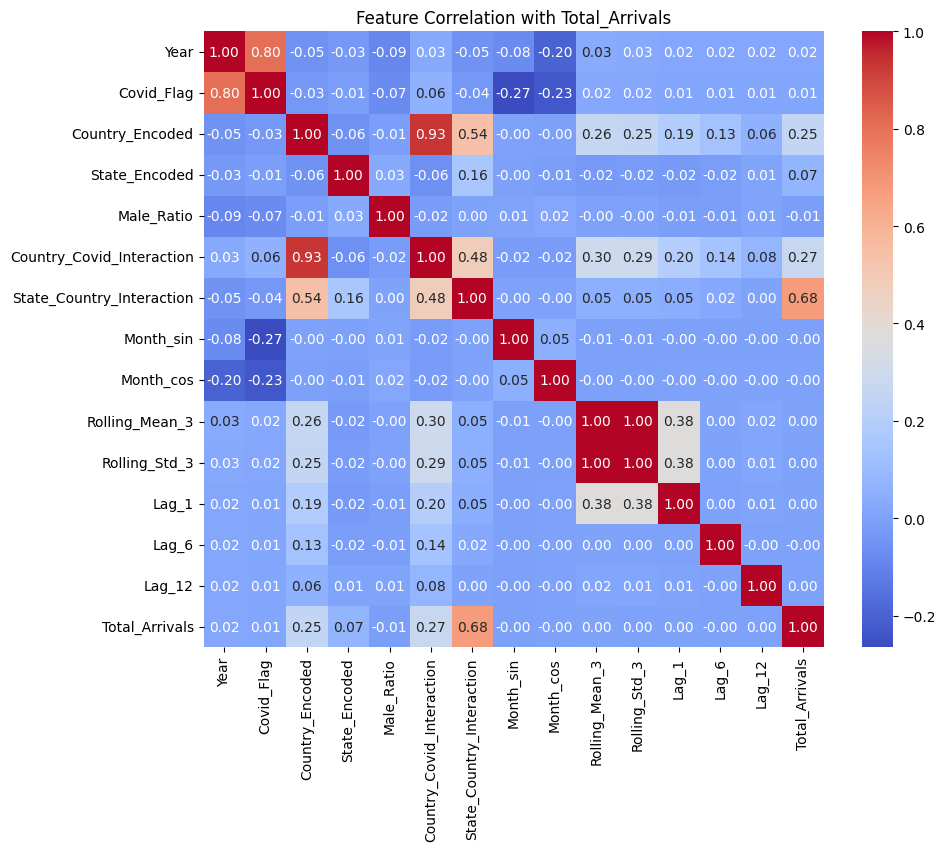

In [ ]:
#correlation check
plt.figure(figsize=(10, 8))
corr = df[features + [target]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation with Total_Arrivals")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

# 1. Sort by time
df = df.sort_values(by='Date').reset_index(drop=True)

# 2. Feature and target separation
X = df[features]
y = df[target]

# 3. Time-based split
split_index = int(len(df) * 0.8)

# 4. Target transformation for non-tree models
y_for_boxcox = y + 1  # ensure positive values for Box-Cox
y_boxcox, fitted_lambda = boxcox(y_for_boxcox)

y_train_scaled = y_boxcox[:split_index]
y_test_scaled = y_boxcox[split_index:]

# 5. Input features for non-tree models
X_train_scaled = X.iloc[:split_index]
X_test_scaled = X.iloc[split_index:]

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled), columns=X.columns, index=X_train_scaled.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns=X.columns, index=X_test_scaled.index)

# 6. Tree-based models: no scaling or Box-Cox
X_train_tree = X.iloc[:split_index].copy()
X_test_tree = X.iloc[split_index:].copy()
y_train_tree = y.iloc[:split_index].copy()
y_test_tree = y.iloc[split_index:].copy()

# Optional: if you want consistent names for later use in model training
y_train = y_train_scaled  # for MLP, SVM, LSTM
y_test = y_test_scaled

# Show dimensions
print(f"Non-tree models ➤ X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")
print(f"Tree-based models ➤ X_train: {X_train_tree.shape}, X_test: {X_test_tree.shape}")


Non-tree models ➤ X_train: (31151, 14), X_test: (7788, 14)
Tree-based models ➤ X_train: (31151, 14), X_test: (7788, 14)


#Modeling

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Metric Function ---
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, smape, r2

# --- Time Series CV ---
tscv = TimeSeriesSplit(n_splits=5)

# --- Model Definitions ---
models = {
    "Random Forest": (RandomForestRegressor(n_estimators=100, random_state=42), X_train_tree, y_train_tree),
    "XGBoost": (xgb.XGBRegressor(n_estimators=100, random_state=42), X_train_tree, y_train_tree),
    "SVM": (SVR(kernel='rbf'), X_train_scaled, y_train_scaled),
    "MLP": (MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42), X_train_scaled, y_train_scaled),
}

# --- Results Container ---
results = {'Model': [], 'RMSE': [], 'MAE': [], 'SMAPE': [], 'R2': []}

# --- Model Training Loop ---
for name, (model, X_data, y_data) in models.items():
    rmse_list, mae_list, smape_list, r2_list = [], [], [], []

    for train_idx, test_idx in tscv.split(X_data):
        X_train_cv, X_test_cv = X_data.iloc[train_idx], X_data.iloc[test_idx]
        # Use numpy indexing for y_data since it's a numpy array
        y_train_cv, y_test_cv = y_data[train_idx], y_data[test_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)

        rmse, mae, smape, r2 = calculate_metrics(y_test_cv, y_pred)
        rmse_list.append(rmse)
        mae_list.append(mae)
        smape_list.append(smape)
        r2_list.append(r2)

    results['Model'].append(name)
    results['RMSE'].append(np.mean(rmse_list))
    results['MAE'].append(np.mean(mae_list))
    results['SMAPE'].append(np.mean(smape_list))
    results['R2'].append(np.mean(r2_list))

# --- LSTM Training (Special Case) ---
lstm_rmse, lstm_mae, lstm_smape, lstm_r2 = [], [], [], []

for train_idx, test_idx in tscv.split(X_train_scaled):
    X_train_cv, X_test_cv = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[test_idx]
    y_train_cv, y_test_cv = y_train_scaled[train_idx], y_train_scaled[test_idx]

    # Reshape data for LSTM
    X_train_cv_lstm = X_train_cv.values.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1))
    X_test_cv_lstm = X_test_cv.values.reshape((X_test_cv.shape[0], X_test_cv.shape[1], 1))

    # LSTM model definition
    lstm_model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train_cv_lstm.shape[1], 1)),
        Dense(1)
    ])
    lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train LSTM
    lstm_model.fit(X_train_cv_lstm, y_train_cv, epochs=10, batch_size=32, verbose=0)

    # Predict and evaluate
    y_pred = lstm_model.predict(X_test_cv_lstm).flatten()
    rmse, mae, smape, r2 = calculate_metrics(y_test_cv, y_pred)

    lstm_rmse.append(rmse)
    lstm_mae.append(mae)
    lstm_smape.append(smape)
    lstm_r2.append(r2)

results['Model'].append('LSTM')
results['RMSE'].append(np.mean(lstm_rmse))
results['MAE'].append(np.mean(lstm_mae))
results['SMAPE'].append(np.mean(lstm_smape))
results['R2'].append(np.mean(lstm_r2))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# --- Final Results DataFrame ---
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2', ascending=True).reset_index(drop=True)
print("Evaluation Metrics:\n",results_df)

Evaluation Metrics:
            Model          RMSE          MAE       SMAPE        R2
0           LSTM      0.839154     0.674358   37.135704  0.223447
1            SVM      0.748573     0.580598   33.874385  0.339355
2            MLP      0.641693     0.501876   29.936559  0.537318
3        XGBoost  14823.624340  1081.993921  145.628558  0.617716
4  Random Forest  13806.914617  1005.017775   79.716652  0.732726


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
grid_search_rf.fit(X_train_tree, y_train_tree)

# Best parameters for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xg_reg = xgb.XGBRegressor(random_state=42)

# Apply GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_xgb.fit(X_train_tree, y_train_tree)

# Best parameters for XGBoost
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svm = SVR()

# Apply GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_svm.fit(X_train_scaled, y_train_scaled)

# Best parameters for SVM
print("Best Parameters for SVM:", grid_search_svm.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize MLP model
mlp = MLPRegressor(max_iter=5000, random_state=42)

# Apply GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search_mlp.fit(X_train_scaled, y_train_scaled)

# Best parameters for MLP
print("Best Parameters for MLP:", grid_search_mlp.best_params_)


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:127: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis

Best Parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Function to create model for tuning
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   activation='relu', input_shape=(X_train_scaled.shape[1], 1),
                   return_sequences=True))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='mean_squared_error')

    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(build_lstm_model, objective='val_loss', max_epochs=10, factor=3, directory='lstm_tuning', project_name='lstm_tuning')

# Reshape data for LSTM
X_train_lstm = X_train_scaled.values.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.values.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Perform hyperparameter tuning
tuner.search(X_train_lstm, y_train_scaled, epochs=10, validation_data=(X_test_lstm, y_test_scaled))

# Best hyperparameters for LSTM
best_hps = tuner.get_best_hyperparameters()[0]
print("Best Parameters for LSTM:", best_hps.values)


Trial 4 Complete [00h 01m 01s]
val_loss: 0.43477413058280945

Best val_loss So Far: 0.43030646443367004
Total elapsed time: 00h 03m 37s
Best Parameters for LSTM: {'units': 200, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


#Retrain Models

In [ ]:
# Use the best parameters you got from GridSearchCV
best_params_rf = {
    'n_estimators': 50,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Retrain the model with best parameters
rf_best = RandomForestRegressor(**best_params_rf)
rf_best.fit(X_train_tree, y_train_tree)

# Make predictions
y_pred_rf = rf_best.predict(X_test_tree)

# If you need to evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_rf = np.sqrt(mean_squared_error(y_test_tree, y_pred_rf))
mae_rf = mean_absolute_error(y_test_tree, y_pred_rf)
smape_rf = 100/len(y_test_tree) * np.sum(2 * np.abs(y_pred_rf - y_test_tree) / (np.abs(y_pred_rf) + np.abs(y_test_tree)))
r2_rf = r2_score(y_test_tree, y_pred_rf)

print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"SMAPE: {smape_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


Random Forest Performance:
RMSE: 10183.4051
MAE: 841.0917
SMAPE: 69.4077
R²: 0.9535


In [ ]:
# Define best parameters
import xgboost as xgb

best_params_xgb = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 50,
    'subsample': 0.8,
    'random_state': 42
}

# Initialize and train the model
xgb_best = xgb.XGBRegressor(**best_params_xgb)
xgb_best.fit(X_train_tree, y_train_tree)

# Make predictions
y_pred_xgb = xgb_best.predict(X_test_tree)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test_tree, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_tree, y_pred_xgb)
smape_xgb = 100 / len(y_test_tree) * np.sum(
    2 * np.abs(y_pred_xgb - y_test_tree) / (np.abs(y_pred_xgb) + np.abs(y_test_tree))
)
r2_xgb = r2_score(y_test_tree, y_pred_xgb)

print("XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"SMAPE: {smape_xgb:.4f}")
print(f"R²: {r2_xgb:.4f}")


XGBoost Performance:
RMSE: 10659.6330
MAE: 1015.6725
SMAPE: 129.8108
R²: 0.9490


In [ ]:
# Define the best parameters
best_params_svm = {
    'C': 1,
    'gamma': 'scale',
    'kernel': 'rbf'
}

# Initialize and train the SVR model
svr_best = SVR(**best_params_svm)
svr_best.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_svr = svr_best.predict(X_test_scaled)

# Evaluation metrics
rmse_svr = np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr))
mae_svr = mean_absolute_error(y_test_scaled, y_pred_svr)
smape_svr = 100 / len(y_test_scaled) * np.sum(
    2 * np.abs(y_pred_svr - y_test_scaled) / (np.abs(y_pred_svr) + np.abs(y_test_scaled))
)
r2_svr = r2_score(y_test_scaled, y_pred_svr)

# Print performance
print("SVM Performance:")
print(f"RMSE: {rmse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"SMAPE: {smape_svr:.4f}")
print(f"R²: {r2_svr:.4f}")


SVM Performance:
RMSE: 0.6216
MAE: 0.4843
SMAPE: 25.8194
R²: 0.5997


In [ ]:
# Define the best parameters
best_params_mlp = {
    'activation': 'tanh',
    'hidden_layer_sizes': (50, 50),
    'learning_rate_init': 0.01,
    'solver': 'adam',
    'max_iter': 5000,  # You can increase this if convergence warnings persist
    'random_state': 42
}

# Initialize and train the model
mlp_best = MLPRegressor(**best_params_mlp)
mlp_best.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_pred_mlp = mlp_best.predict(X_test_scaled)

# Evaluation
rmse_mlp = np.sqrt(mean_squared_error(y_test_scaled, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test_scaled, y_pred_mlp)
smape_mlp = 100 / len(y_test_scaled) * np.sum(
    2 * np.abs(y_pred_mlp - y_test_scaled) / (np.abs(y_pred_mlp) + np.abs(y_test_scaled))
)
r2_mlp = r2_score(y_test_scaled, y_pred_mlp)

print("MLP Performance:")
print(f"RMSE: {rmse_mlp:.4f}")
print(f"MAE: {mae_mlp:.4f}")
print(f"SMAPE: {smape_mlp:.4f}")
print(f"R²: {r2_mlp:.4f}")


MLP Performance:
RMSE: 0.4951
MAE: 0.3893
SMAPE: 22.2066
R²: 0.7461


In [ ]:
# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled.values, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled.values, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model using best hyperparameters
model_lstm = Sequential()
model_lstm.add(LSTM(units=200, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_scaled,
    epochs=50,  # You can adjust this
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Make predictions
y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()

# Evaluation
rmse_lstm = np.sqrt(mean_squared_error(y_test_scaled, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_scaled, y_pred_lstm)
smape_lstm = 100 / len(y_test_scaled) * np.sum(
    2 * np.abs(y_pred_lstm - y_test_scaled) / (np.abs(y_pred_lstm) + np.abs(y_test_scaled))
)
r2_lstm = r2_score(y_test_scaled, y_pred_lstm)

# Print performance
print("LSTM Performance:")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")
print(f"SMAPE: {smape_lstm:.4f}")
print(f"R²: {r2_lstm:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


779/779 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.3750 - val_loss: 0.8680
Epoch 2/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.8320 - val_loss: 0.7886
Epoch 3/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.7085 - val_loss: 0.5235
Epoch 4/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.4933 - val_loss: 0.4607
Epoch 5/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.4528 - val_loss: 0.4346
Epoch 6/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.4339 - val_loss: 0.4126
Epoch 7/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.4184 - val_loss: 0.3999
Epoch 8/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4081 - val_loss: 0.3938
Epoch 9/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4008 - val_loss: 0.3902
Epoch 10/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3951 - val_loss: 0.3875
Epoch 11/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3905 - val_loss: 0.3850
Epoch 12/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 

In [ ]:
# Dictionary of model metrics
results = {
    'Model': ['Random Forest', 'XGBoost', 'SVM', 'MLP', 'LSTM'],
    'RMSE': [rmse_rf, rmse_xgb, rmse_svr, rmse_mlp, rmse_lstm],
    'MAE': [mae_rf, mae_xgb, mae_svr, mae_mlp, mae_lstm],
    'SMAPE': [smape_rf, smape_xgb, smape_svr, smape_mlp, smape_lstm],
    'R2': [r2_rf, r2_xgb, r2_svr, r2_mlp, r2_lstm]
}

# Create and sort DataFrame by R2 score
df_tuned_results = pd.DataFrame(results)
df_tuned_results_sorted = df_tuned_results.sort_values(by='R2', ascending=True).reset_index(drop=True)

# Display the combined and sorted results
print("Model Evaluation After Tuning:\n", df_tuned_results_sorted)


Model Evaluation After Tuning:
            Model          RMSE          MAE       SMAPE        R2
0            SVM      0.621576     0.484264   25.819413  0.599702
1           LSTM      0.580297     0.445565   24.844393  0.651104
2            MLP      0.495065     0.389312   22.206603  0.746066
3        XGBoost  10659.633014  1015.672546  129.810813  0.949040
4  Random Forest  10183.405080   841.091745   69.407699  0.953492


#Evaluation

In [ ]:
# Define the dataframe
before_df = results_df.copy()
after_df = df_tuned_results.copy()

# Split and sort DataFrames alphabetically by 'Model'
tree_before_df = before_df[before_df["Model"].isin(["Random Forest", "XGBoost"])].sort_values(by="Model").reset_index(drop=True)
tree_after_df = after_df[after_df["Model"].isin(["Random Forest", "XGBoost"])].sort_values(by="Model").reset_index(drop=True)

non_tree_before_df = before_df[~before_df["Model"].isin(["Random Forest", "XGBoost"])].sort_values(by="Model").reset_index(drop=True)
non_tree_after_df = after_df[~after_df["Model"].isin(["Random Forest", "XGBoost"])].sort_values(by="Model").reset_index(drop=True)

# Tree-based models
print("Tree-Based Models - Before Tuning:\n", tree_before_df)
print("\nTree-Based Models - After Tuning:\n", tree_after_df)

# Non-tree-based models
print("\nNon-Tree-Based Models - Before Tuning:\n", non_tree_before_df)
print("\nNon-Tree-Based Models - After Tuning:\n", non_tree_after_df)


Tree-Based Models - Before Tuning:
            Model          RMSE          MAE       SMAPE        R2
0  Random Forest  13806.914617  1005.017775   79.716652  0.732726
1        XGBoost  14823.624340  1081.993921  145.628558  0.617716

Tree-Based Models - After Tuning:
            Model          RMSE          MAE       SMAPE        R2
0  Random Forest  10183.405080   841.091745   69.407699  0.953492
1        XGBoost  10659.633014  1015.672546  129.810813  0.949040

Non-Tree-Based Models - Before Tuning:
   Model      RMSE       MAE      SMAPE        R2
0  LSTM  0.839154  0.674358  37.135704  0.223447
1   MLP  0.641693  0.501876  29.936559  0.537318
2   SVM  0.748573  0.580598  33.874385  0.339355

Non-Tree-Based Models - After Tuning:
   Model      RMSE       MAE      SMAPE        R2
0  LSTM  0.580297  0.445565  24.844393  0.651104
1   MLP  0.495065  0.389312  22.206603  0.746066
2   SVM  0.621576  0.484264  25.819413  0.599702


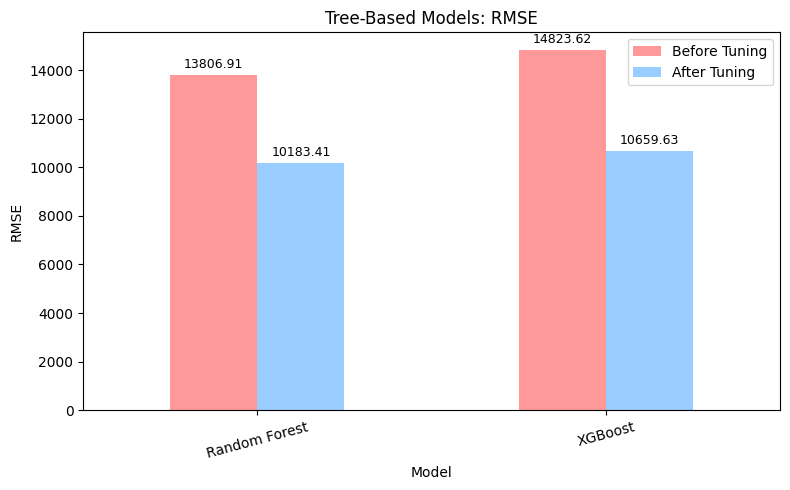

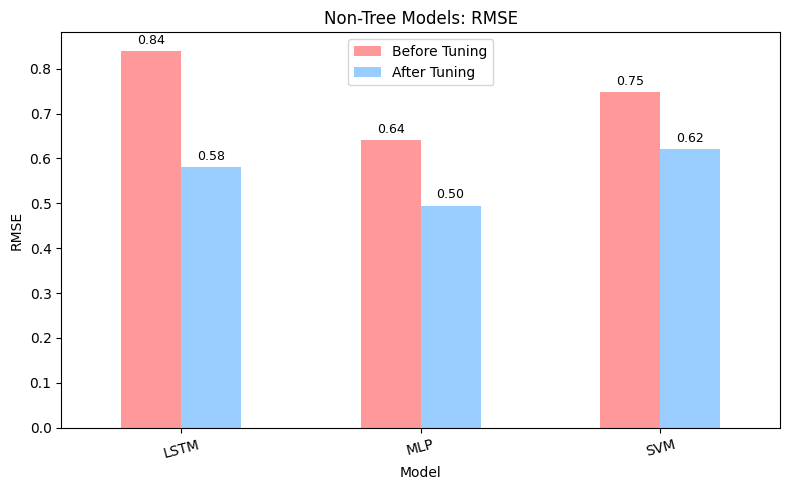

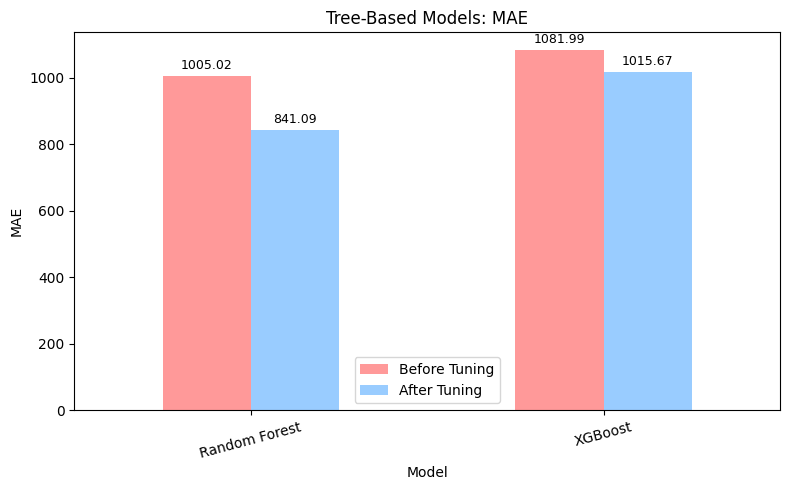

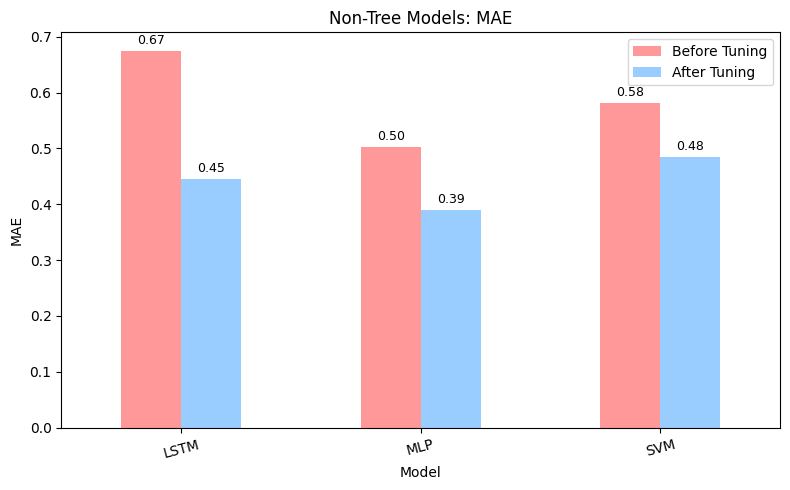

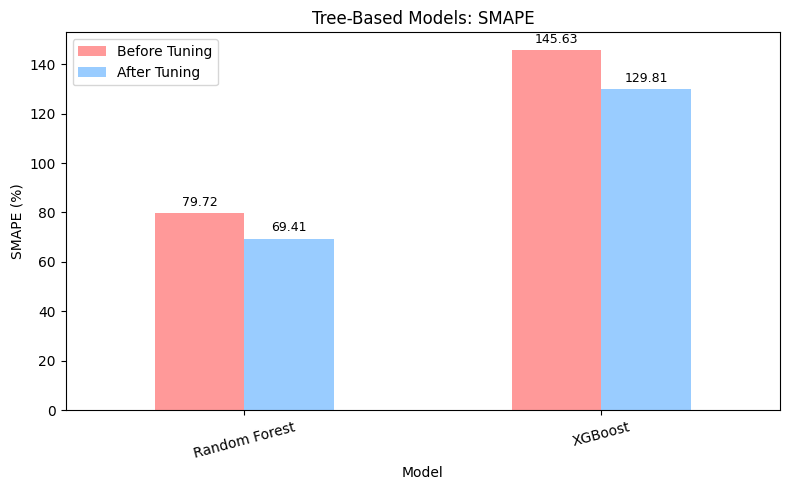

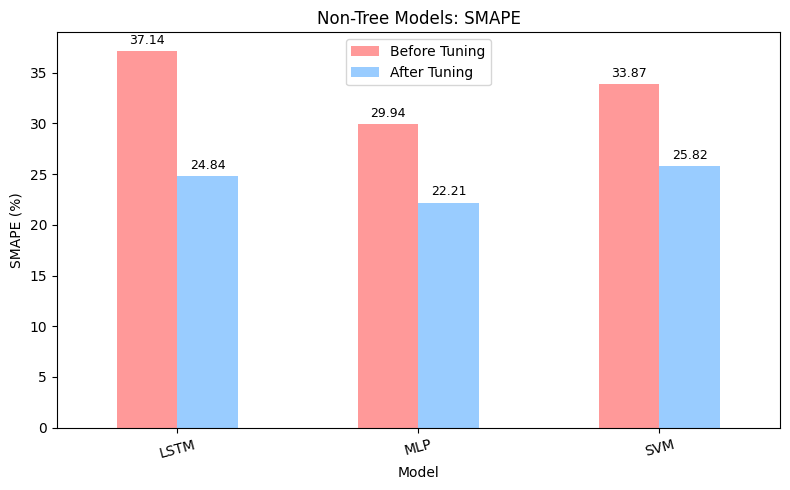

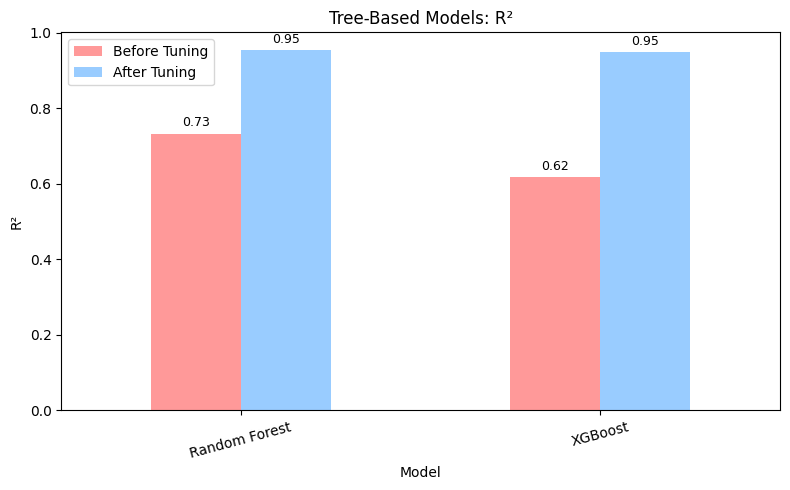

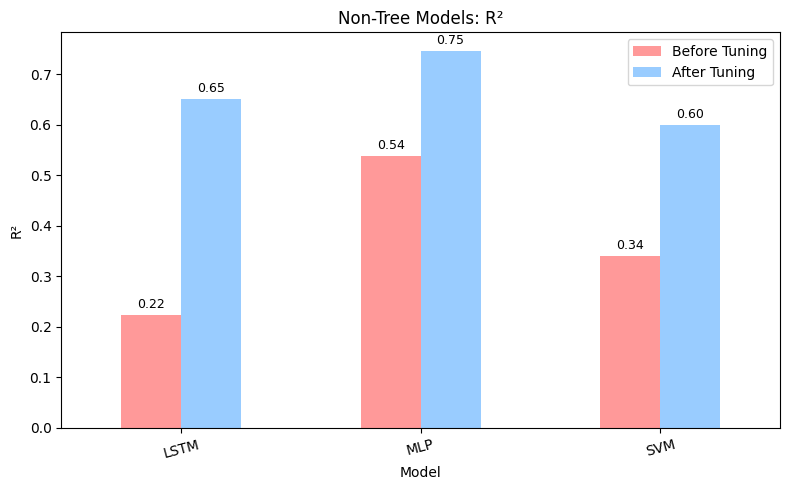

In [ ]:
#Plot to see

# Plot function
def plot_group_comparison(before, after, metric, title, ylabel):
    fig, ax = plt.subplots(figsize=(8, 5))
    df_plot = pd.merge(before[["Model", metric]], after[["Model", metric]], on="Model", suffixes=('_Before', '_After'))
    df_plot = df_plot.set_index("Model")
    colors = ["#FF9999", "#99CCFF"]
    bars = df_plot.plot(kind="bar", ax=ax, color=colors)

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Model")
    ax.legend(["Before Tuning", "After Tuning"])
    plt.xticks(rotation=15)

    # Add value labels
    for container in bars.containers:
        bars.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

    plt.tight_layout()
    plt.show()

# RMSE
plot_group_comparison(tree_before_df, tree_after_df, "RMSE", "Tree-Based Models: RMSE", "RMSE")
plot_group_comparison(non_tree_before_df, non_tree_after_df, "RMSE", "Non-Tree Models: RMSE", "RMSE")

#MAE
plot_group_comparison(tree_before_df, tree_after_df, "MAE", "Tree-Based Models: MAE", "MAE")
plot_group_comparison(non_tree_before_df, non_tree_after_df, "MAE", "Non-Tree Models: MAE", "MAE")

#SMAPE
plot_group_comparison(tree_before_df, tree_after_df, "SMAPE", "Tree-Based Models: SMAPE", "SMAPE (%)")
plot_group_comparison(non_tree_before_df, non_tree_after_df, "SMAPE", "Non-Tree Models: SMAPE", "SMAPE (%)")

#R2
plot_group_comparison(tree_before_df, tree_after_df, "R2", "Tree-Based Models: R²", "R²")
plot_group_comparison(non_tree_before_df, non_tree_after_df, "R2", "Non-Tree Models: R²", "R²")


Among non-tree models, MLP outperformed LSTM and SVM with the lowest RMSE (0.527), MAE (0.404), and SMAPE (23.1%).

Among tree-based models, Random Forest achieved better RMSE and SMAPE than XGBoost, indicating stronger performance on unscaled data.

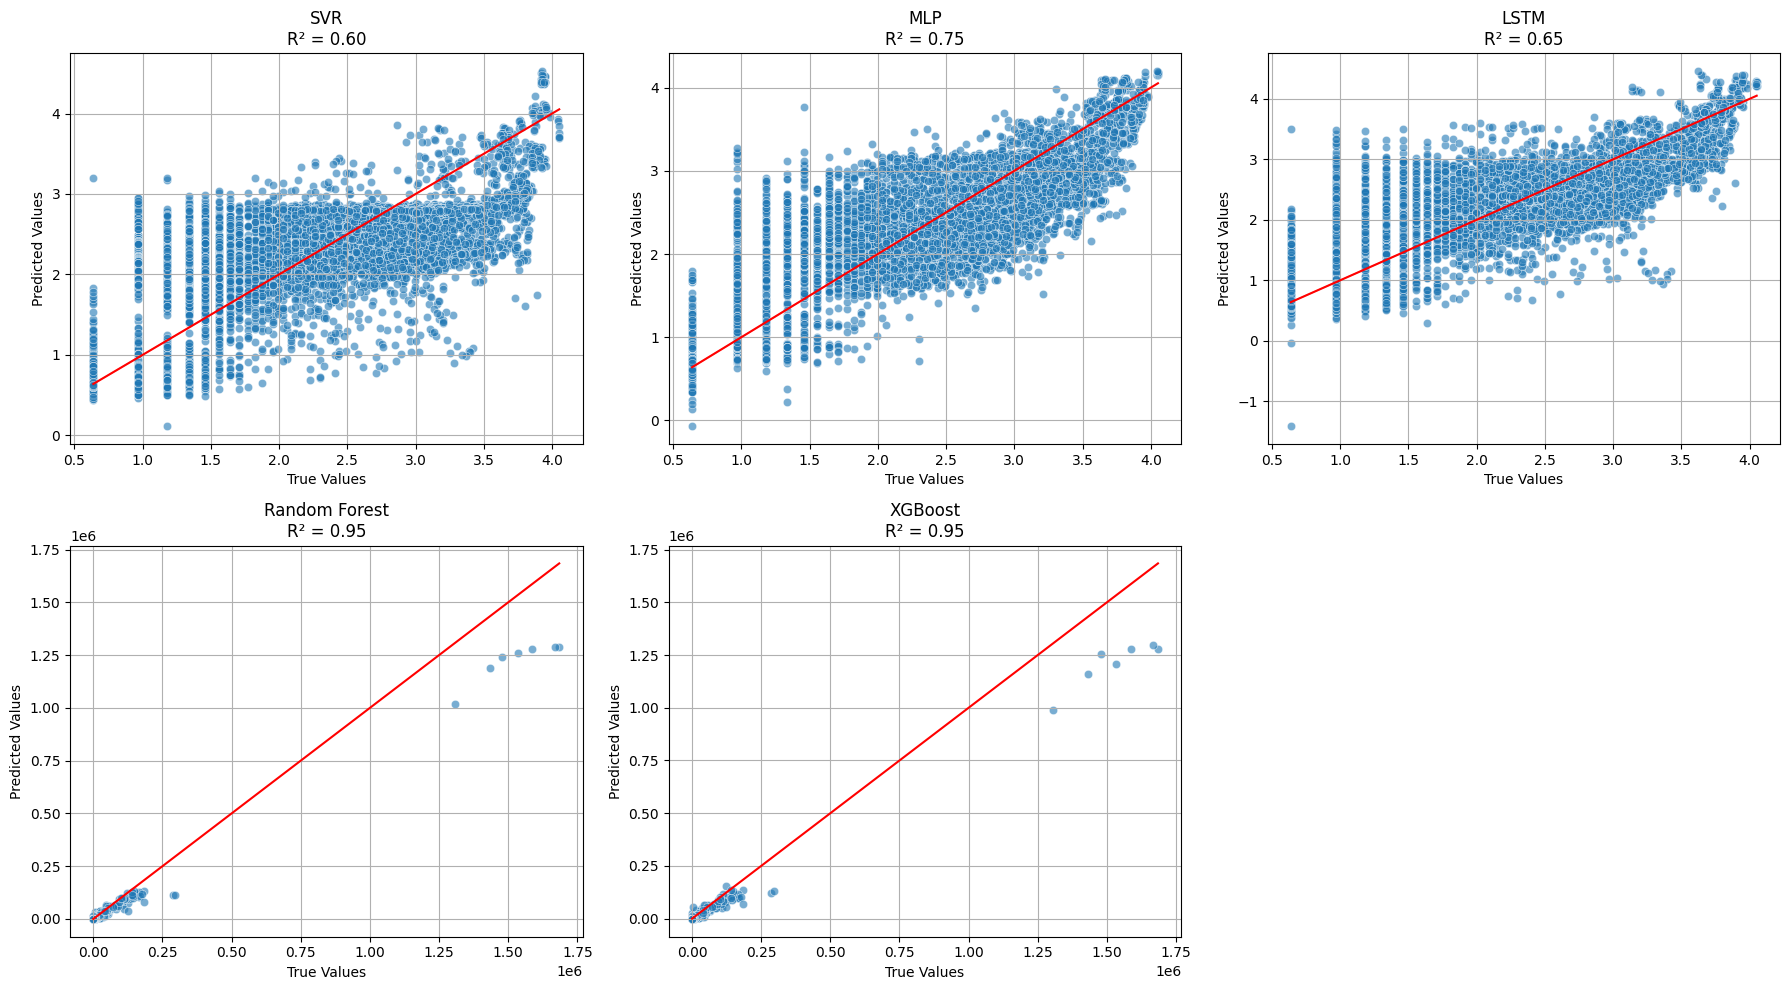

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Define models and their corresponding y_test sets
models = {
    'SVR': (y_test_scaled, y_pred_svr),
    'MLP': (y_test_scaled, y_pred_mlp),
    'LSTM': (y_test_scaled, y_pred_lstm),
    'Random Forest': (y_test_tree, y_pred_rf),
    'XGBoost': (y_test_tree, y_pred_xgb)
}

# Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, (name, (y_true, y_pred)) in zip(axes.flatten(), models.items()):
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, ax=ax)
    sns.lineplot(x=y_true, y=y_true, color='red', ax=ax)
    ax.set_title(f'{name}\nR² = {r2_score(y_true, y_pred):.2f}')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.grid(True)

# Hide the empty subplot if you have only 5 models
if len(models) < len(axes.flatten()):
    axes.flatten()[-1].axis('off')

plt.tight_layout()
plt.show()


##Feature Permutation Importance

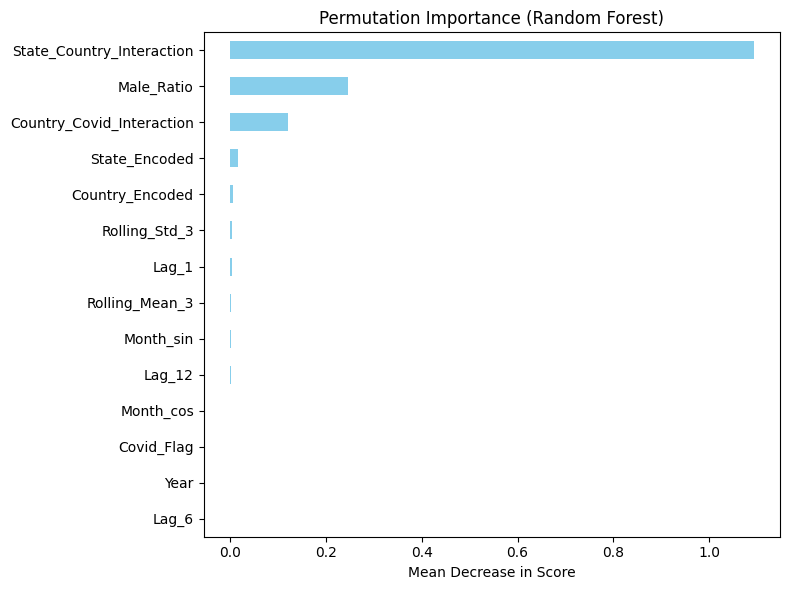

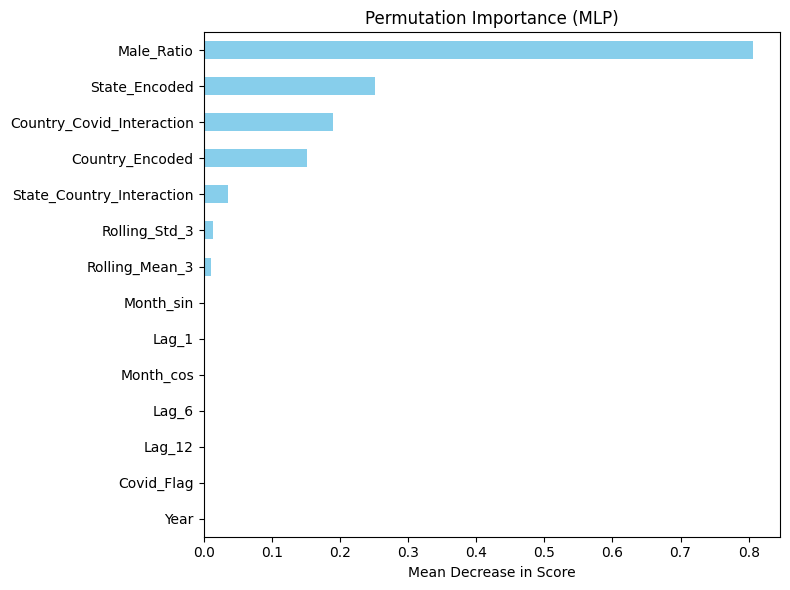

In [ ]:
from sklearn.inspection import permutation_importance

# Function to plot permutation importance
def plot_permutation_importance(model, x_test, y_test, feature_names, title="Permutation Importance", n_repeats=10):
    result = permutation_importance(model, x_test, y_test, n_repeats=n_repeats, random_state=42)
    importances = pd.Series(result.importances_mean, index=feature_names)
    importances = importances.sort_values(ascending=True)

    plt.figure(figsize=(8, 6))
    importances.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel("Mean Decrease in Score")
    plt.tight_layout()
    plt.show()

# For Random Forest
plot_permutation_importance(rf_best, X_test_tree, y_test_tree, X_test_tree.columns,
                            title="Permutation Importance (Random Forest)")

# For MLP
plot_permutation_importance(mlp_best, X_test_scaled, y_test, X_test_scaled.columns,
                            title="Permutation Importance (MLP)")


##Forecast Accuracy

In [ ]:
# Forecast accuracy function for multiple horizons
def forecast_horizon_accuracy(model, x_test, y_test, horizons, model_name):
    results = []

    # Predict on full test set
    predictions = model.predict(x_test)

    # Ensure both y_test and predictions are numpy arrays for slicing
    y_test = np.array(y_test)
    predictions = np.array(predictions)

    for h in horizons:
        # For horizon h, select every h-th element starting from index h-1
        y_true_h = y_test[h-1::h]
        y_pred_h = predictions[h-1::h]

        # Adjust to ensure lengths match
        min_len = min(len(y_true_h), len(y_pred_h))
        y_true_h = y_true_h[:min_len]
        y_pred_h = y_pred_h[:min_len]

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_true_h, y_pred_h))
        mae = mean_absolute_error(y_true_h, y_pred_h)
        smape = np.mean(2.0 * np.abs(y_pred_h - y_true_h) / (np.abs(y_pred_h) + np.abs(y_true_h))) * 100
        r2 = r2_score(y_true_h, y_pred_h)

        # Store each observation with metrics
        for i in range(min_len):
            results.append({
                'Horizon': h,
                'Model': model_name,
                'Actual': y_true_h[i],         # renamed from 'y_true'
                'Predicted': y_pred_h[i],      # renamed from 'y_pred'
                'RMSE': rmse,
                'MAE': mae,
                'SMAPE': smape,
                'R2': r2
            })

    return pd.DataFrame(results)

# List of horizons to evaluate
horizons = [1, 3, 6]

# Run for Random Forest
rf_results = forecast_horizon_accuracy(rf_best, X_test_tree, y_test_tree, horizons, "Random Forest")

# Run for MLP
mlp_results = forecast_horizon_accuracy(mlp_best, X_test_scaled, y_test_scaled, horizons, "MLP")

# Display first few rows
print(rf_results.head())
print(mlp_results.head())



   Horizon          Model  Actual   Predicted         RMSE         MAE  \
0        1  Random Forest       1    1.420793  10183.40508  841.091745   
1        1  Random Forest       5    7.675874  10183.40508  841.091745   
2        1  Random Forest      46  130.648615  10183.40508  841.091745   
3        1  Random Forest     747  562.364762  10183.40508  841.091745   
4        1  Random Forest     598  526.186073  10183.40508  841.091745   

       SMAPE        R2  
0  69.407699  0.953492  
1  69.407699  0.953492  
2  69.407699  0.953492  
3  69.407699  0.953492  
4  69.407699  0.953492  
   Horizon Model    Actual  Predicted      RMSE       MAE      SMAPE        R2
0        1   MLP  0.638837   0.723022  0.495065  0.389312  22.206603  0.746066
1        1   MLP  1.457826   2.071859  0.495065  0.389312  22.206603  0.746066
2        1   MLP  2.518123   3.101130  0.495065  0.389312  22.206603  0.746066
3        1   MLP  3.325935   2.746108  0.495065  0.389312  22.206603  0.746066
4        1

In [ ]:
# Plotting function
def plot_actual_vs_predicted(results_df, model_name, horizon):
    # Filter by horizon
    df = results_df[results_df['Horizon'] == horizon].reset_index(drop=True)

    # Limit to first 50 rows for clarity
    df = df.head(50)

    plt.figure(figsize=(12, 5))
    plt.plot(df['Actual'], label='Actual', color='red', marker='o')
    plt.plot(df['Predicted'], label='Predicted', color='skyblue', marker='x')

    plt.title(f'{model_name} Forecast - Horizon {horizon}')
    plt.xlabel('Observation Index')
    plt.ylabel('Total Arrivals')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




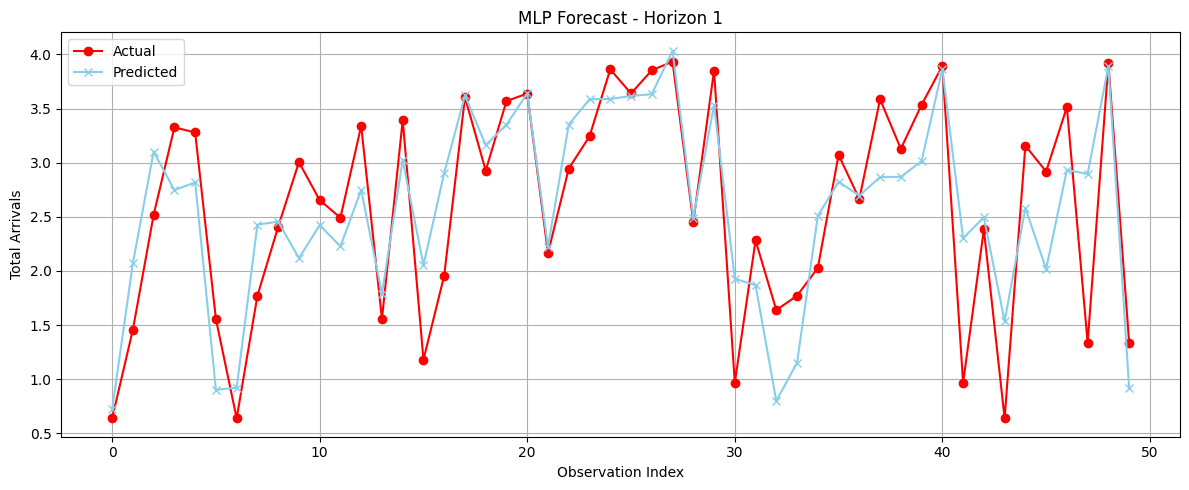

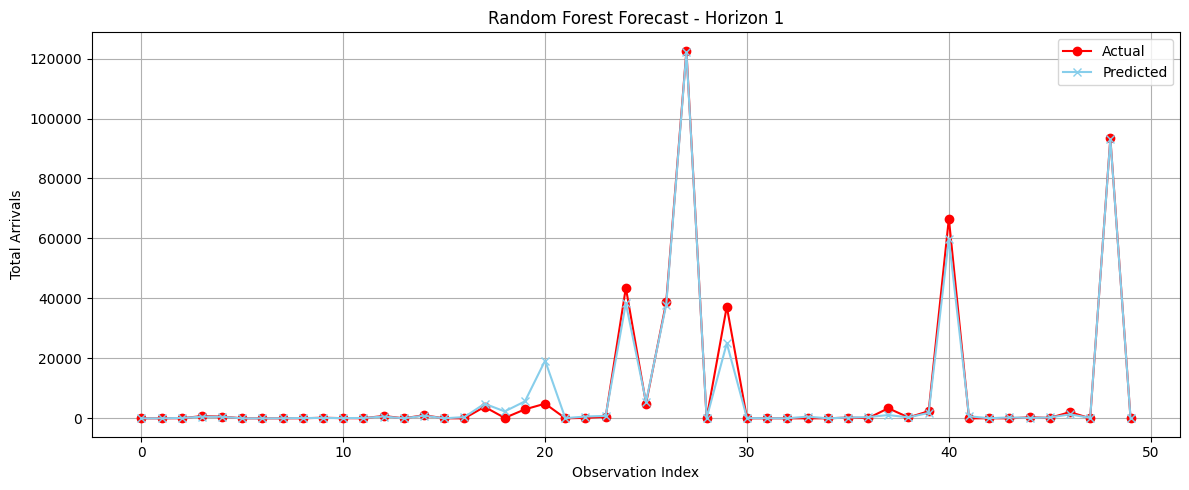

In [ ]:
# Plot for Horizon
plot_actual_vs_predicted(mlp_results, "MLP", horizon=1)
plot_actual_vs_predicted(rf_results, "Random Forest", horizon=1)

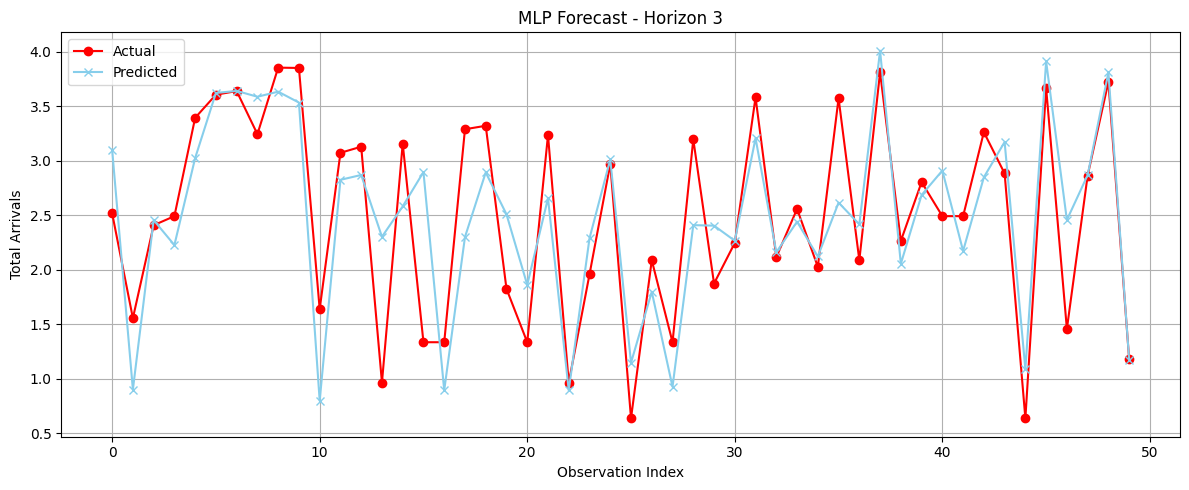

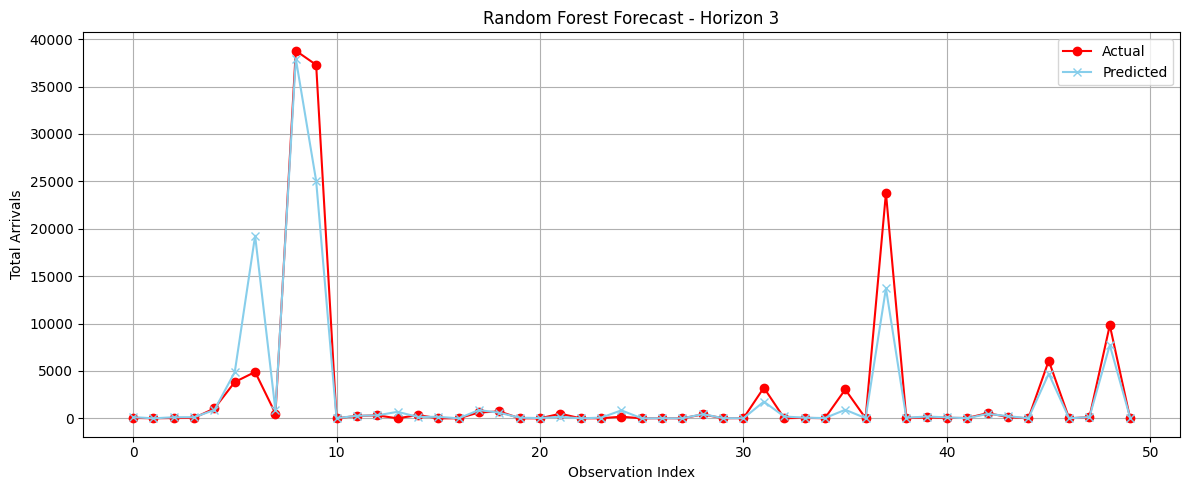

In [ ]:
plot_actual_vs_predicted(mlp_results, "MLP", horizon=3)
plot_actual_vs_predicted(rf_results, "Random Forest", horizon=3)

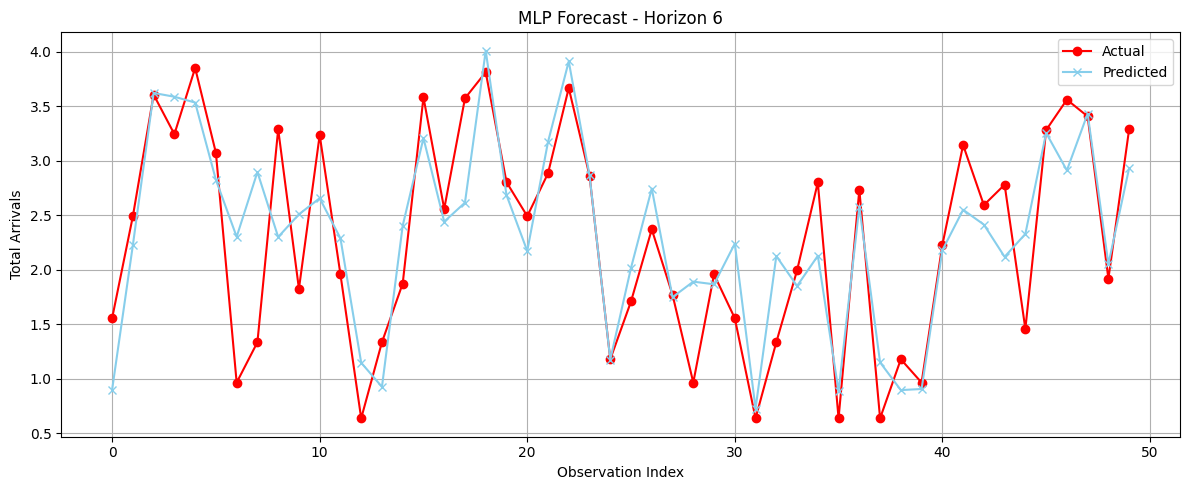

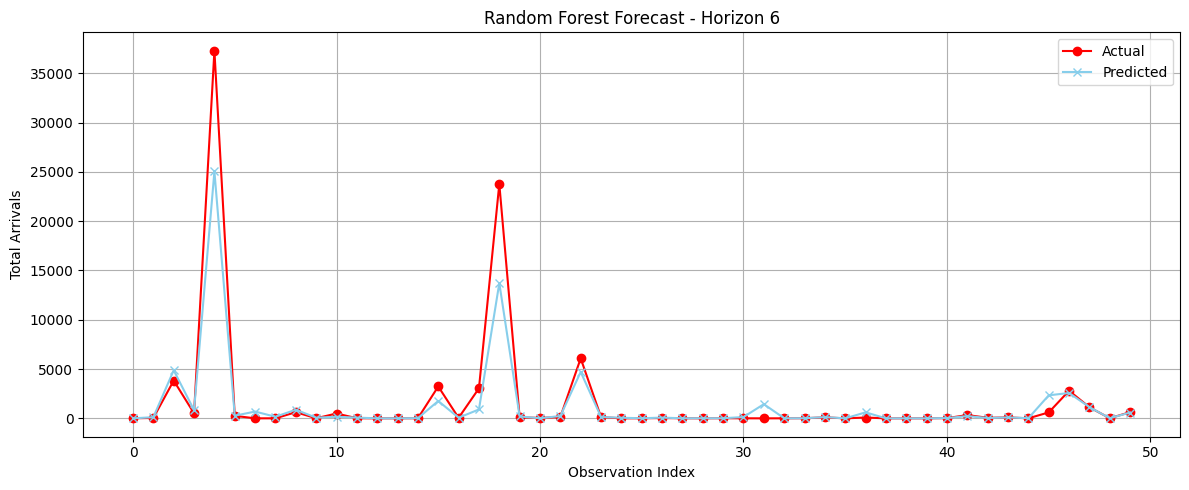

In [ ]:
plot_actual_vs_predicted(mlp_results, "MLP", horizon=6)
plot_actual_vs_predicted(rf_results, "Random Forest", horizon=6)

##Save to CSV for Power BI

In [ ]:
def prepare_for_powerbi(before_df, after_df):
    # Add a column to mark before/after tuning
    before_df = before_df.copy()
    before_df['Status'] = 'Before Tuning'
    after_df = after_df.copy()
    after_df['Status'] = 'After Tuning'

    # Concatenate before and after
    combined_df = pd.concat([before_df, after_df], axis=0)

    # Add a column for model type
    combined_df['Model_Type'] = combined_df['Model'].apply(lambda x: 'Tree-Based' if x in ['Random Forest', 'XGBoost'] else 'Non-Tree')

    # Melt the dataframe to long format for metrics
    combined_long_df = combined_df.melt(id_vars=['Model', 'Status', 'Model_Type'],
                                       value_vars=['RMSE', 'MAE', 'SMAPE', 'R2'],
                                       var_name='Metric', value_name='Value')
    return combined_long_df

# Prepare combined data
combined_powerbi_df = prepare_for_powerbi(before_df=before_df, after_df=after_df)

# Save to CSV
combined_powerbi_df.to_csv("model_metrics_comparison_powerbi.csv", index=False)

print("Saved combined model metrics CSV for Power BI!")


Saved combined model metrics CSV for Power BI!


In [ ]:
# Prepare a list to collect data for all models
all_results = []

for name, (y_true, y_pred) in models.items():
    df_temp = pd.DataFrame({
        'Model': name,
        'True_Value': y_true.flatten() if hasattr(y_true, 'flatten') else y_true,
        'Predicted_Value': y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred
    })
    all_results.append(df_temp)

# Concatenate all model results into one dataframe
true_vs_pred_df = pd.concat(all_results, ignore_index=True)

# Save to CSV
true_vs_pred_df.to_csv('true_vs_predicted_values.csv', index=False)

print("Saved true vs predicted values for all models to 'true_vs_predicted_values.csv'")


Saved true vs predicted values for all models to 'true_vs_predicted_values.csv'
